Berkson's Paradox occurs when there is no correlation between variables in the population as a whole but there appears to be correlation within some subset of the population due to a selection pressure.

For example, suppose players of a hypothetical game "stringball" are rated according to speed and strength. Players with high speed can be attackers in stringball, and players with high strength make good defenders. Within the population as a whole, speed and strength are uncorrelated: they are uniformly distributed from 0 to 1 for each individual and the score in one does not affect the score in the other.

However, suppose we apply a selection pressure: if a player scores over 0.8 for either speed or strength, they become a pro player. Now, within the pro player population, there appears to be a strong negative correlation between speed and strength, despite the pro players being from the same original population!

Intuitively, if we just look at players with high enough speed to go pro, the distribution of strength is uniform, as in the normal population. But then on top of that, we add a bunch of players who had high strength but low speed, so the variables appear inversely correlated.

Imports

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
r.seed(1)

Data & Graphs

Correlation (all players): 0.025
Correlation (pros only):  -0.564 (n = 198)


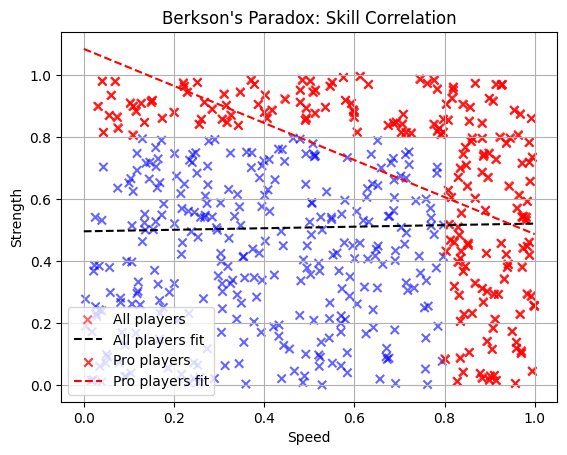

In [2]:
populationSize = 500

def generateIndividual():
    skills = [r.uniform(0, 1), r.uniform(0, 1)]
    goPro = 1 if max(skills) > 0.8 else 0
    return [skills, goPro]

population = [generateIndividual() for c in range(populationSize)]

allX = [ind[0][0] for ind in population]
allY = [ind[0][1] for ind in population]
prosX = [ind[0][0] for ind in population if ind[1] == 1]
prosY = [ind[0][1] for ind in population if ind[1] == 1]

corrAll = np.corrcoef(allX, allY)[0, 1]
corrPros = np.corrcoef(prosX, prosY)[0, 1] if len(prosX) > 1 else None

print(f"Correlation (all players): {corrAll:.3f}")
print(f"Correlation (pros only):  {corrPros:.3f} (n = {len(prosX)})")

colors = ["red" if ind[1] == 1 else "blue" for ind in population]
plt.scatter(allX, allY, c = colors, alpha = 0.6, label = "All players", marker = "x")

coefAll = np.polyfit(allX, allY, 1)
polyAll = np.poly1d(coefAll)
xRange = np.linspace(0, 1, 100)
plt.plot(xRange, polyAll(xRange), color = "black", linestyle = "--", label = "All players fit")
coefPros = np.polyfit(prosX, prosY, 1)
polyPros = np.poly1d(coefPros)
plt.scatter(prosX, prosY, c = "red", alpha = 0.8, label = "Pro players", marker = "x")
plt.plot(xRange, polyPros(xRange), color = "red", linestyle = "--", label = "Pro players fit")
plt.xlabel("Speed")
plt.ylabel("Strength")
plt.title("Berkson's Paradox: Skill Correlation")
plt.legend()
plt.grid(True)
plt.show()